In [1]:
from Bio import SeqIO #these are for importing certain packages we will need throughout the script
from Bio.Data import CodonTable
import pandas as pd
from Bio.Alphabet import IUPAC 
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq


# Functions

## 1 ##
## Dr. X: this gets sequences 

In [2]:
def get_sequences_from_file(fasta_fn): #defines a function that will get sequences from a fasta file
    sequence_data_dict = {}# puts the sequences in a dictionary format
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)#return the sequences from the file in a dictionary format

In [3]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # assigns sequences to cytb_seqs in a dictionary

In [4]:
type(cytb_seqs) #return type: dictionary

dict

In [5]:
for key, value in cytb_seqs.items(): #for loop that prints whole dictionary with key-value pairs
    print (key, "->", value)

Aptenodytes forsteri -> ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTAT

## 2 ##
###### YOUR STRING-TRANSLATE FUNCTION ########

In [6]:
def translate_function(string_nucleotides): #This define a code to act on a string of nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_string = "" #Assings the output to the string of amino acids
    for x in range(0,len(string_nucleotides)-3, 3): #Loops through a string of nucleotides and for every 3 nuclotides it meets, it returns a codon 
     codon = string_nucleotides[x : x + 3] #defines a codon as a sequence string of 3 nuclotides
     aa_string = aa_string + mito_table.forward_table[codon]
    return(aa_string)

###### Quick test on species specific sequences to test whether the code works robust

In [7]:
 Aptenodytes_forsteri_translated = translate_function("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

In [8]:
Aptenodytes_forsteri_translated

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [9]:
Aptenodytes_patagonicus_translated = translate_function("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

In [10]:
Aptenodytes_patagonicus_translated

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH'

## 3 ##
###### YOUR ALTERNATIVE FUNCTION

In [11]:
def alt_translate_funtion(dict): # defines the function to act on a dictionary
    for key, value in cytb_seqs.items(): # for the keys in the cytochrome b sequence dictionary:
        aa_string = value.translate(table="Vertebrate Mitochondrial", to_stop = False) #translate the coding seq using the table from biopython to generate codons
        return(aa_string)#at the end, give us the string of amino acids

Testing the alt_translate_function using Pygoscelis papua sequnce

In [12]:
Pygoscelis_papua_tranlated = alt_translate_funtion('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCCCTAATTGACCTACCCACCCCACCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATTTGCCTAATCACACAGATCCTAACTGGCCTCCTACTAGCCATACACTACACCGCAGACACAACCTTAGCCTTCTCCTCCATCGCCCACACATGCCGAAACGTACAATACGGCTGACTAATCCGCAACCTCCATGCAAACGGAGCCTCATTCTTCTTTATCTGCATCTACTTCCACATCGGCCGCGGGCTCTACTATGGCTCATACCTATACAAAGAAACCTGAAACACAGGCATCATCCTCCTACTTACCCTTATAGCAACTGCTTTCGTAGGCTATGTTCTACCATGAGGACAAATATCCTTCTGAGGGGCCACTGTTATCACCAACTTATTCTCAGCCATCCCTTACGTCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGTTTCTCAGTAGACAACCCCACATTAACCCGATTCTTTGCACTACACTTTCTTCTTCCCTTCATAATCACAGGCCTCACTCTCATCCACCTTACCTTCCTCCACGAATCAGGTTCAAACAACCCACTGGGCATTGTAGCCAACTCTGACAAAATCCCATTTCACCCATACTACTCCACAAAAGACATCCTAGGGTTCGCACTCATACTCCTTCCACTAACAACCCTCGCCTTATTTTCACCCAACTTACTAGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCTCACATCAAACCAGAGTGATATTTCCTATTTGCATACGCCATCCTACGCTCAATTCCCAATAAACTAGGAGGAGTACTAGCCCTAGCCGCCTCCGTATTAATTCTATTCTTAAGCCCCCTTCTCCACAAATCCAAACAACGCACAATAGCCTTCCGCCCACTCTCTCAACTCCTATTCTGAACCTTAGTCGCCAATCTACTCATCCTGACATGAATCGGCAGCCAACCAGTAGAACACCCATTCATCATCATTGGTCAACTAGCCTCCACCACCTACTTTATCATCCTCCTAATCCTCTTCCCCATTACCAGTGCCCTAGAAAACAAAATACTAAACTTCTAG')

In [13]:
Pygoscelis_papua_tranlated 

Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...NH*', HasStopCodon(ExtendedIUPACProtein(), '*'))

## 4 ##
###### YOUR COUNT AA ANALYSIS FUNCTION 

In [14]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
#http://biopython.org/wiki/ProtParam

In [15]:
def compute_molecular_weight(aa_seq): #Defines a function to act on a sequence of amino acids
    analysed_seq = ProteinAnalysis(aa_seq) #Uses the ProteinAnalysis function acting on a string of amino acids.
    return analysed_seq.molecular_weight() # Returns the molecular weight of analyzed sequnces.

##### Testing the molecular_weight function code on a random string of amino acids to ensure that it works fine.

In [16]:
compute_molecular_weight('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFTLHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFILLLLPLTALALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH')

42445.54929999999

## 5 ##
##### YOUR GC CONTENT ANALYSIS FUNCTION

In [17]:
from Bio.SeqUtils import GC #Loads a package to calculate the GC content for every sequence

In [18]:
def compute_GC_content(string_nucleotides): #Defines a code to compute the GC content given a string of nucleotides
    GC_content = GC(string_nucleotides)# The GC variable to be returned is defined
    return GC(string_nucleotides)
#This returns the proportions of GC content in the given sequence of nucleotides.

In [19]:
#Quick test with Eudyptes chrysolophus sequence to ensure that the code works fine.
compute_GC_content('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCCCTAATCGACCTACCCACTCCATCAAACATCTCCGCCTGATGAAACTTCGGATCTCTTCTGGGCATCTGCCTGGCCACACAAATCCTAACCGGCCTCTTACTGGCTGCCCACTACACCGCAGACACCACTCTAGCTTTCTCCTCCGTCGCCCATACATGCCGAAACGTACAATATGGCTGATTAATCCGCAATCTACACGCAAATGGAGCCTCATTCTTCTTCATCTGCATCTACCTTCACATCGGCCGCGGACTCTACTACGGCTCCTACCTGTACAAAGAAACCTGAAATACAGGCATTATCCTCCTGCTCACCCTCATAGCAACCGCCTTCGTAGGCTATGTCCTACCATGGGGCCAAATATCCTTCTGAGGGGCCACAGTCATCACCAACCTATTCTCAGCCATCCCCTATATCGGCCAAACCCTCGTAGAATGGGCCTGAGGCGGCTTCTCAGTAGACAACCCCACACTAACCCGATTCTTCACACTACACTTCCTTCTCCCCTTCATAATCGCAGGCCTCACCCTAATCCACCTCACCTTCCTCCACGAGTCAGGCTCAAACAACCCACTAGGCATCGTAGCCAACTCCGACAAAATCCCATTCCACCCCTACTACTCCACAAAAGATATCCTAGGATTTATCCTCCTACTCCTTCCACTAACAGCCCTTGCCCTATTCTCACCCAACTTGCTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCCCTAGTCACACCCCCACATATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA')

50.91863517060367

In [20]:
#Alternatively, we can do it manually with Aptenodytes forsteri sequence 
GC("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")
#http://biopython.org/DIST/docs/api/Bio.SeqUtils-pysrc.html#GC

48.38145231846019

###   MAIN   ###

In [21]:

import pandas as pd

In [22]:
penguins_df = pd.read_csv("penguins_mass.csv")

In [23]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


## 6 ## 
###### Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
Set the value to 'NaN' to indicate that these cells are currently empty.
I will subset everything to a list.

In [24]:
penguins_df['molecular_weight'] = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN','NaN','NaN','NaN','NaN', 'NaN']

In [25]:
penguins_df['GC_content'] = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN','NaN','NaN','NaN','NaN', 'NaN']

In [26]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## 7 ##
###### Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content

In [27]:
#First defined the codes to input in the forward loop
for key, value in cytb_seqs.items(): #for each key and value (species name and seq) in the cytochrome b dictionary
    aa_seq =translate_function(str(value))#Converts the string to a value which is compatible with the translate function
    molecular_weight = compute_molecular_weight(aa_seq)#Defines the function to calculate molecular weight whict acts on a string of aa_seq
    GC_content = compute_GC_content(str(value))#Defines the function to calculate GC_content but it first converts the strings of nucleotides to value for the function to work

In [28]:
# for loop to calculate molecular weight and percent GC_content
row_counter = 0 # start the row counter at 0, which allows us to iterate over the rows in the dataframe to fill in values
for key,value in cytb_seqs.items(): #for each key and value (species name and seq) in the cytochrome b dictionary
    aa_seq = translate_function(str(value))#Converts the string to a value which is compatible with the translate function to translate strings of nucleotides and return aa_string
    molecular_weight = compute_molecular_weight(aa_seq)#molecular_weight is the molecular weight function acting on a string of aa_seq
    GC_content = compute_GC_content(str(value))#GC_content is the function that calculates the proportion of GC on a string of nucleotides assigned to a value
    penguins_df.set_value(row_counter, 'molecular_weight', molecular_weight)
    penguins_df.set_value(row_counter, 'GC_content', GC_content) # set_value allows us to iterate over the rows and adds the molecular weight of amino acids and GC content of nucleotides to the df
    row_counter = row_counter + 1 # tells the for loop to iterate over rows and add 1 to the index each time 
print(penguins_df)
# Found the `set_value` function to add my amino acid values to the dataframe at:http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_value.html

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00          42459.6    48.3815
1   Aptenodytes patagonicus  13.40          42563.7    49.6938
2       Eudyptes chrysocome   2.80          42475.6    51.1811
3     Eudyptes chrysolophus   4.50          42445.5    50.9186
4         Eudyptes sclateri   4.25          42475.6    50.8311
5           Eudyptula minor   1.60          42491.6    49.2563
6        Pygoscelis adeliae   4.60          42458.6    49.0814
7     Pygoscelis antarctica   4.10          42404.5     47.769
8          Pygoscelis papua   6.10          42595.9    47.1566
9       Spheniscus demersus   3.20          42431.5     48.294
10     Spheniscus humboldti   4.75          42399.6    49.2563
11  Spheniscus magellanicus   3.40          42459.6    48.2065


In [29]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294



## 8 ##
#Plot a bar-chart of the mass with the x-axes labeled with species names.


In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#These packages are pretty handy with plotting

In [31]:
%matplotlib inline
#This function allows us to plot the graphs in our jupyter notebook

In [32]:
penguin_bar_chart = penguins_df.iloc[0:11, 0:2] #Using the .iloc function, I can slice subsets of the columns I need to generate my plot and write it to a new variable

In [33]:
penguin_bar_chart

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


Text(0.5,1,'Mass against species')

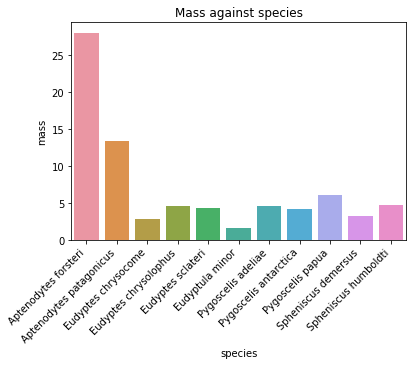

In [34]:
penguin_bar_plot = sns.barplot(x="species", y="mass", data=penguin_bar_chart) #using seaborn to generate a bar plot that uses species on the x and mass of penguins on y 
penguin_bar_plot.set_xticklabels(labels = penguin_bar_chart.species, rotation=45,  horizontalalignment='right') #allows us to rotate the x-axis labels for reading ease 
penguin_bar_plot.set_title('Mass against species')
# how to rotate labels: http://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot
# seaborn plot: http://seaborn.pydata.org/tutorial/categorical.html

##The smallest species is Eudyptula minor.  Eudyptula minor, common name 'little penguin' is the smallest species of penguin. It grows to an average of 33 cm (13 in) in height and 43 cm (17 inch) in length and usually weighs about 1.5 kg on average (3.3 lb).Like most seabirds, they have a long lifespan. The average for the species is 6.5 years, but flipper ringing experiments show in very exceptional cases up to 25 years in captivity #https://en.wikipedia.org/wiki/Little_penguin
According to The IUCN Red List of Threatened Species(tm), "Despite the fact that the population trend appears to be stable, with localised decreases in population size driven by human disturbance and climatic variability, the decline is not believed to be sufficiently rapid to approach the thresholds for Vulnerable under the population trend criterion (>30% decline over ten years or three generations)".

## 9##
##Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

In [35]:
plot_molecular_weight = penguins_df.loc[0:11, ['species','molecular_weight', 'GC_content']] #Selects rows from 0 to 11 and returns only the 3rd and 4th columns.

In [36]:
plot_molecular_weight

,species,molecular_weight,GC_content
0,Aptenodytes forsteri,42459.6,48.3815
1,Aptenodytes patagonicus,42563.7,49.6938
2,Eudyptes chrysocome,42475.6,51.1811
3,Eudyptes chrysolophus,42445.5,50.9186
4,Eudyptes sclateri,42475.6,50.8311
5,Eudyptula minor,42491.6,49.2563
6,Pygoscelis adeliae,42458.6,49.0814
7,Pygoscelis antarctica,42404.5,47.769
8,Pygoscelis papua,42595.9,47.1566
9,Spheniscus demersus,42431.5,48.294


In [37]:
sns.set(font_scale=1.5)#This will increase the font size of the labels by 50% in all of our subsequent plots.

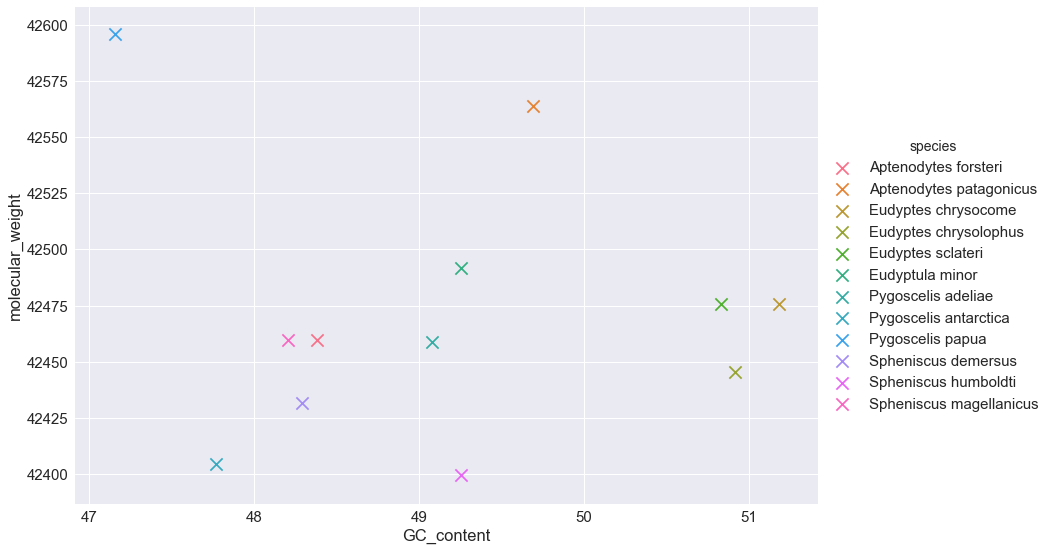

In [38]:
Penguin_molecular_weight_GC_plot =sns.lmplot("GC_content", "molecular_weight", data=plot_molecular_weight, fit_reg=False, size=8, aspect=1.5, scatter_kws={'alpha':1,"s": 150},hue='species',markers='x')

## 10 ##
#Save the new DataFrame to a file called "penguins_mass_cytb.csv"


In [39]:
penguins_df.to_csv('penguins_mass_cytb.csv', encoding='utf-8', index=True) #This line of code allows me to output a Pandas DataFrame as a CSV file using a specific character encoding of the encoding argument.
#I set my index to True so as to store preeceding indices of each row of my dataframe object. Insexing by False would eliminate it.
#https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file

11.
# Bonus

1.
#### Data melting

In [40]:
penguins_melted = pd.melt(penguins_df, id_vars=['species'], value_vars=['molecular_weight', 'GC_content'])
#melts the data so we can plot it more easily, changing both the molecular_weight and GC_ to a variable
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

In [41]:
penguins_melted

,species,variable,value
0,Aptenodytes forsteri,molecular_weight,42459.6
1,Aptenodytes patagonicus,molecular_weight,42563.7
2,Eudyptes chrysocome,molecular_weight,42475.6
3,Eudyptes chrysolophus,molecular_weight,42445.5
4,Eudyptes sclateri,molecular_weight,42475.6
5,Eudyptula minor,molecular_weight,42491.6
6,Pygoscelis adeliae,molecular_weight,42458.6
7,Pygoscelis antarctica,molecular_weight,42404.5
8,Pygoscelis papua,molecular_weight,42595.9
9,Spheniscus demersus,molecular_weight,42431.5


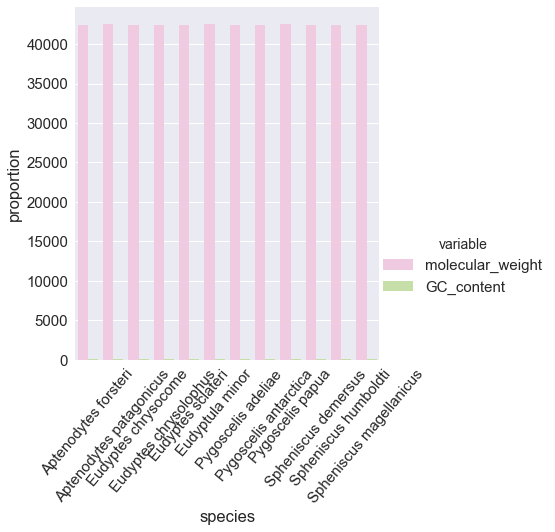

In [42]:
sns.set_style("darkgrid")#http://seaborn.pydata.org/tutorial/aesthetics.html --> how to get the dark grid
aa_plot =sns.factorplot(x="species", y="value", hue="variable", data=penguins_melted, kind ="bar", size=6, palette="PiYG")# http://seaborn.pydata.org/examples/factorplot_bars.html
aa_plot.set_ylabels("proportion")#https://chrisalbon.com/python/seaborn_color_palettes.html
aa_plot.set_xticklabels(rotation=50)#http://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot --> how to tweek labels


### This data tells me that these species have almost equal molecular weights per translated codons and the GC content doesn't differ that much also.

2.
##### Other ways to work with the data.
Compute the melting temperatures of the aa_strings

In [43]:
#Create a copy of penguins_df to work with, in addition to both molecular weight and GC content, add another column that calculates the melting temperature.
penguins_df_copy = pd.read_csv("penguins_mass.csv")

In [44]:
penguins_df_copy['molecular_weight'] = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN','NaN','NaN','NaN','NaN', 'NaN']

In [45]:
penguins_df_copy['GC_content'] = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN','NaN','NaN','NaN','NaN', 'NaN']

In [46]:
penguins_df_copy['Melting_temperature'] = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN','NaN','NaN','NaN','NaN', 'NaN']

In [47]:
penguins_df_copy

,species,mass,molecular_weight,GC_content,Melting_temperature
0,Aptenodytes forsteri,28.00,NaN,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN,NaN


def compute_GC_content(string_nucleotides): #Defines a code to the GC content given a string of nucleotides
    GC_content = GC(string_nucleotides)# The GC variable to be returned is defined
    return GC(string_nucleotides)
#This returns the proportions of GC content in the given sequence of nucleotides.

In [48]:
from Bio.SeqUtils import MeltingTemp as mt #Quick check to find out whether I have a package to help me estimate the melting temperature of my aa_strings.

In [49]:
def compute_melting_temp(sequence): #Defines a code to calculate the melting temperature of a string
    aa_seq = str(Seq(sequence))
    TM = mt.Tm_GC(aa_seq)
    return TM

In [50]:
#First defined the codes to input in the forward loop
for key, value in cytb_seqs.items(): #for each key and value (species name and seq) in the cytochrome b dictionary
    aa_seq =translate_function(str(value))#Converts the string to a value which is compatible with the translate function
    molecular_weight = compute_molecular_weight(aa_seq)#Defines the function to calculate molecular weight whict acts on a string of aa_seq
    GC_content = compute_GC_content(str(value))#Defines the function to calculate GC_content but it first converts the strings of nucleotides to value for the function to work
    Melting_temperature = compute_melting_temp(str(value))

In [51]:
# for loop to calculate molecular weight and percent GC_content
row_counter = 0 # start the row counter at 0, which allows us to iterate over the rows in the dataframe to fill in values
for key,value in cytb_seqs.items(): #for each key and value (species name and seq) in the cytochrome b dictionary
    aa_seq = translate_function(str(value))#Converts the string to a value which is compatible with the translate function to translate strings of nucleotides and return aa_string
    molecular_weight = compute_molecular_weight(aa_seq)#molecular_weight is the molecular weight function acting on a string of aa_seq
    GC_content = compute_GC_content(str(value))#GC_content is the function that calculates the proportion of GC on a string of nucleotides assigned to a value
    Melting_temperature = compute_melting_temp(str(value))
    penguins_df_copy.set_value(row_counter, 'molecular_weight', molecular_weight)
    penguins_df_copy.set_value(row_counter, 'GC_content', GC_content)
    penguins_df_copy.set_value(row_counter, 'Melting_temperature', Melting_temperature)
    # set_value allows us to iterate over the rows and adds the molecular weight of amino acids and GC content of nucleotides to the df
    row_counter = row_counter + 1 # tells the for loop to iterate over rows and add 1 to the index each time 
print(penguins_df_copy)
# Found the `set_value` function to add my amino acid values to the dataframe at:http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_value.html

                    species   mass molecular_weight GC_content  \
0      Aptenodytes forsteri  28.00          42459.6    48.3815   
1   Aptenodytes patagonicus  13.40          42563.7    49.6938   
2       Eudyptes chrysocome   2.80          42475.6    51.1811   
3     Eudyptes chrysolophus   4.50          42445.5    50.9186   
4         Eudyptes sclateri   4.25          42475.6    50.8311   
5           Eudyptula minor   1.60          42491.6    49.2563   
6        Pygoscelis adeliae   4.60          42458.6    49.0814   
7     Pygoscelis antarctica   4.10          42404.5     47.769   
8          Pygoscelis papua   6.10          42595.9    47.1566   
9       Spheniscus demersus   3.20          42431.5     48.294   
10     Spheniscus humboldti   4.75          42399.6    49.2563   
11  Spheniscus magellanicus   3.40          42459.6    48.2065   

   Melting_temperature  
0              78.9664  
1              79.5044  
2              80.1142  
3              80.0066  
4              7

In [52]:
penguins_df_copy

,species,mass,molecular_weight,GC_content,Melting_temperature
0,Aptenodytes forsteri,28.00,42459.6,48.3815,78.9664
1,Aptenodytes patagonicus,13.40,42563.7,49.6938,79.5044
2,Eudyptes chrysocome,2.80,42475.6,51.1811,80.1142
3,Eudyptes chrysolophus,4.50,42445.5,50.9186,80.0066
4,Eudyptes sclateri,4.25,42475.6,50.8311,79.9707
5,Eudyptula minor,1.60,42491.6,49.2563,79.3251
6,Pygoscelis adeliae,4.60,42458.6,49.0814,79.2533
7,Pygoscelis antarctica,4.10,42404.5,47.769,78.7153
8,Pygoscelis papua,6.10,42595.9,47.1566,78.4642
9,Spheniscus demersus,3.20,42431.5,48.294,78.9305
